In [1]:
import cv2
import imutils
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

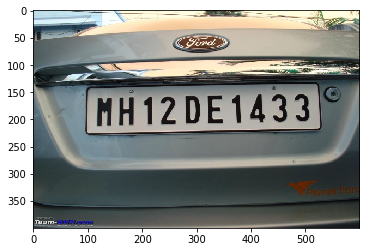

In [3]:
img = cv2.imread('D://test.jpg',cv2.IMREAD_COLOR)
img = cv2.resize(img, (600,400) )
cv2.imshow("original image", img)
plt.imshow(img)
plt.show()

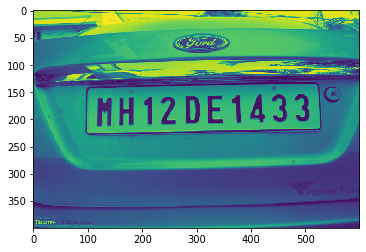

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
cv2.imshow("greyed image", gray)
plt.imshow(gray)
plt.show()

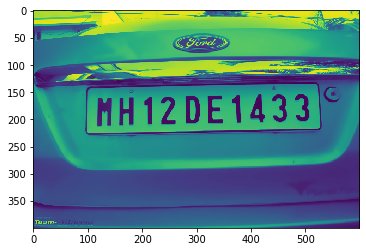

In [5]:
gray = cv2.bilateralFilter(gray, 13, 15, 15) 
cv2.imshow("smoothened image", gray)
plt.imshow(gray)
plt.show()

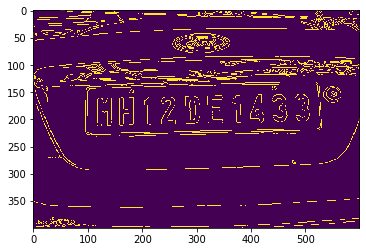

In [6]:
edged = cv2.Canny(gray, 30, 200)
cv2.imshow("edged image", edged)
plt.imshow(edged)
plt.show()

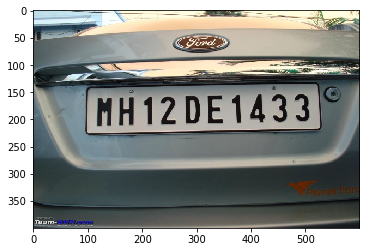

In [7]:
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
cv2.imshow("contours",img)
plt.imshow(img)
plt.show()

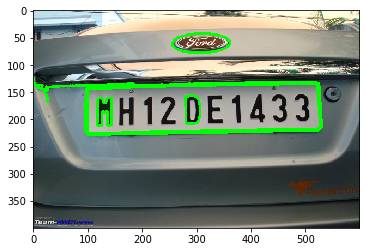

In [8]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None
cv2.drawContours(img,contours,-1,(0,255,0),3)
cv2.imshow("Top 30 contours",img)
plt.imshow(img)
plt.show()


In [9]:
for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

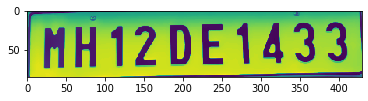

In [11]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
cv2.imshow("Cropped",Cropped)
plt.imshow(Cropped)
plt.show()
cv2.destroyAllWindows()

In [ ]:
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("programming_fever's License Plate Recognition\n")
print("Detected license plate Number is:",text)
img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))
cv2.imshow('car',img)
cv2.imshow('Cropped',Cropped)
cv2.destroyAllWindows()